# Code for each Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import export_graphviz
from sklearn import tree

from pipeline_utilities_v2 import model_generator


In [2]:
# Load in data
df = pd.read_csv('https://archive.ics.uci.edu/static/public/329/data.csv')
df.head()

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate3.1,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [3]:
# Create X & Y variables 
df = df.rename(columns={'Class': 'y'})
X = df.drop('y', axis=1)
y = df['y']

In [4]:
# Split the data into training and testing sets using random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# Scale the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.04819627,  0.28301966,  1.05103575, ...,  1.24596785,
         1.1000033 ,  1.40931159],
       [ 0.04819627, -3.53332351,  0.69936235, ..., -1.366194  ,
         1.54411068, -0.70956629],
       [ 0.04819627,  0.28301966, -0.82455572, ..., -1.20344515,
         0.35087711,  1.40931159],
       ...,
       [ 0.04819627,  0.28301966,  1.01196092, ...,  1.49140707,
         1.10539433, -0.70956629],
       [ 0.04819627,  0.28301966, -1.44975288, ..., -1.20351628,
         1.60710061, -0.70956629],
       [ 0.04819627,  0.28301966, -0.16028374, ..., -0.53932595,
         0.00857508,  1.40931159]])

In [6]:
# Transform the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.04819627,  0.28301966,  1.48085879, ..., -0.24021802,
         0.40932723, -0.70956629],
       [ 0.04819627,  0.28301966, -0.47288232, ...,  0.91534867,
        -0.93366347,  1.40931159],
       [ 0.04819627,  0.28301966,  1.83253219, ...,  0.85933261,
        -0.06536715, -0.70956629],
       ...,
       [ 0.04819627,  0.28301966,  0.66028752, ..., -1.44322941,
         0.35831106, -0.70956629],
       [ 0.04819627,  0.28301966, -0.82455572, ..., -0.70840551,
        -0.05946539,  1.40931159],
       [ 0.04819627, -3.53332351,  0.58213788, ...,  0.71692736,
        -0.23413477, -0.70956629]])

In [7]:
# Define Models
models = [("Logistic Regression", LogisticRegression()),
("Support Vector Machine", SVC()),
("K-Nearest Neighbors", KNeighborsClassifier()),
("Decision Tree", DecisionTreeClassifier()),
("Random Forest", RandomForestClassifier()),
("Extremely Random Trees", ExtraTreesClassifier()),
("Gradient Boosting", GradientBoostingClassifier()),
("AdaBoost", AdaBoostClassifier()),
("Naive Bayes", GaussianNB())]

model_scores = []

for name, model in models:
    pipe = Pipeline([('scaler', StandardScaler()),(name, model)])
    model_score  = pipe.fit(X_train, y_train).score(X_test, y_test)
    print(f"Fitting {name}...")
    model_scores.append((name, model_score))
    
    # Predict on the test data
    y_pred = pipe.predict(X_test)
   
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Evaluating {name}...")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Fitting Logistic Regression...
Evaluating Logistic Regression...
Accuracy: 0.6979
Confusion Matrix:
[[102  37]
 [ 50  99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       139
           1       0.73      0.66      0.69       149

    accuracy                           0.70       288
   macro avg       0.70      0.70      0.70       288
weighted avg       0.70      0.70      0.70       288

Fitting Support Vector Machine...
Evaluating Support Vector Machine...
Accuracy: 0.6979
Confusion Matrix:
[[104  35]
 [ 52  97]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       139
           1       0.73      0.65      0.69       149

    accuracy                           0.70       288
   macro avg       0.70      0.70      0.70       288
weighted avg       0.70      0.70      0.70       288

Fitting K-Nearest Neighbors...
Evaluating K-Ne

## Model and Fit to a Logistic Regression Classifier

In [9]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression(random_state=1, max_iter=500)

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=1)

In [10]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7427578215527231
Testing Data Score: 0.6979166666666666


**Hyperparameter Tunning** 

In [11]:
# Define a pipeline combining a scaler and the logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))

# Parameter grid to search
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']  # 'liblinear' and 'saga' work with l1 penalty
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Training Data Score:", grid_search.score(X_train, y_train))
print("Testing Data Score:", grid_search.score(X_test, y_test))

accuracy = accuracy_score(y_test, y_pred)

Best parameters: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Training Data Score: 0.764774044032445
Testing Data Score: 0.7395833333333334


## Model and Fit to a Support Vector Machine

In [12]:
# Create the support vector machine classifier model with a 'rbf' kernel
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', gamma='auto')

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

SVC(gamma='auto')

In [13]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7381228273464658
Testing Data Score: 0.6979166666666666


**Hyperparameter Tunning** 

In [14]:
# Create a pipeline with a scaler and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=1))
])

# Define parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Training Data Score:", grid_search.score(X_train, y_train))
print("Testing Data Score:", grid_search.score(X_test, y_test))


Best parameters: {'svm__C': 100, 'svm__gamma': 0.01}
Training Data Score: 0.7972190034762456
Testing Data Score: 0.7465277777777778


## Model and Fit to a KNN Model

k: 1, Train/Test Score: 1.000/0.590
k: 3, Train/Test Score: 0.793/0.628
k: 5, Train/Test Score: 0.744/0.628
k: 7, Train/Test Score: 0.720/0.642
k: 9, Train/Test Score: 0.709/0.646
k: 11, Train/Test Score: 0.708/0.670
k: 13, Train/Test Score: 0.692/0.656
k: 15, Train/Test Score: 0.687/0.670
k: 17, Train/Test Score: 0.683/0.653
k: 19, Train/Test Score: 0.692/0.632


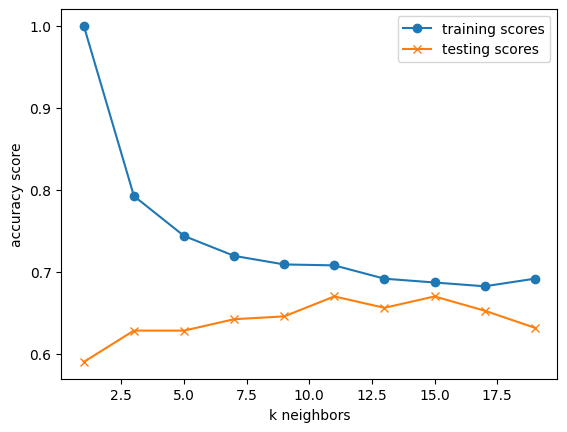

In [15]:
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [16]:
# Create the KNN model with 11 neighbors
knn_model = KNeighborsClassifier(n_neighbors=11)

# Fit the model to the training data
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [17]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7079953650057937
Testing Data Score: 0.6701388888888888


## Model and Fit to a Decision Tree Classifier

In [18]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [19]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {dt_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.6215277777777778


**Hyperparameter Tunning** 

In [20]:
# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)

# Define a grid of parameters to search over
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate on the test set
best_dt = grid_search.best_estimator_
print("Training Data Score:", best_dt.score(X_train, y_train))
print("Testing Data Score:", best_dt.score(X_test, y_test))


Best parameters: {'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training Data Score: 0.7334878331402086
Testing Data Score: 0.5972222222222222


In [21]:
# Create a decision tree graph
dot_data = tree.export_graphviz(
    dt_model, out_file= None, 
    feature_names= X.columns,  
    class_names= ['No Eye Disease', 'Eye Disease'],
    filled=True, rounded=True,  
    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Diabetic Retinopathy.png')

# Show graph
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

## Model and Fit to a Random Forest Classifier

In [22]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128, random_state=1)

In [23]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.6493055555555556


**Hyperparameter Tunning** 

*The accuracy scores show signs of overfitting (perfect training score but significantly lower testing score). Tuning  the hyperparameters with GridSearchCV to find more optimal settings could improve model generalization.*

In [24]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 128, 150],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator
best_rf = grid_search.best_estimator_

# Predict on the testing set
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
print("Training Accuracy:", best_rf.score(X_train_scaled, y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=128; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=128; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=128; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=128; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END m

## Model and Fit to a Extremely Random Trees Classifier

In [25]:
# Train the Extremely Random Trees classifier
ert = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {ert.score(X_train_scaled, y_train)}')
print(f'Testing Score: {ert.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6840277777777778


**Hyperparameter Tunning** 

In [26]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model found by GridSearchCV on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Testing Score: ", test_score)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=128; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max

## Model and Fit to a Gradient Boosting Classifier

In [27]:
# Train the Gradient Boosting classifier
clf = GradientBoostingClassifier(random_state=1).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9003476245654692
Testing Score: 0.6840277777777778


**Hyperparameter Tunning** 

In [28]:
# Initialize the classifier
gbc = GradientBoostingClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]  # Subsample ratio of the training set
}

# Setup GridSearchCV
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and scores
print("Best parameters:", grid_search.best_params_)
print("Training Score:", grid_search.best_estimator_.score(X_train, y_train))
print("Testing Score:", grid_search.best_estimator_.score(X_test, y_test))


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Training Score: 0.9768250289687138
Testing Score: 0.6770833333333334


## Model and Fit to an Adaptive Boosting Classifier

In [29]:
# Train the AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8088064889918888
Testing Score: 0.6319444444444444


**Hyperparameter Tunning** 

In [30]:
# Initialize the base estimator
estimator = DecisionTreeClassifier(max_depth=1)

# Setup AdaBoost with a base estimator
ada = AdaBoostClassifier(estimator=estimator, random_state=42)

# Define a grid of parameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}

# Setup GridSearchCV
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and scores
print("Best parameters:", grid_search.best_params_)
best_ada = grid_search.best_estimator_
print("Training Score:", best_ada.score(X_train, y_train))
print("Testing Score:", best_ada.score(X_test, y_test))


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

Best parameters: {'learning_rate': 1, 'n_estimators': 200}
Training Score: 0.8922363847045192
Testing Score: 0.6840277777777778


## Model and Fit to a Naive Bayes Classifier

In [31]:
# Train the GaussianNB
gnb = GaussianNB().fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {gnb.score(X_train_scaled, y_train)}')
print(f'Testing Score: {gnb.score(X_test_scaled, y_test)}')

# Make predictions on the testing set
y_pred = gnb.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Training Score: 0.6338354577056778
Testing Score: 0.6319444444444444
Accuracy: 0.6319


## Feature Selection:

Use techniques to select the most informative features.

**Removing Features with Low Variance**
This method removes features whose variance does not meet a certain threshold. It is based on the premise that features with low variance are less informative.

In [32]:
from sklearn.feature_selection import VarianceThreshold

# Example: Remove features with less than 80% variance
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X_new_1 = sel.fit_transform(X)


**Univariate Feature Selection**
Univariate feature selection examines each feature individually to determine the strength of the relationship of the feature with the response variable. One common method is SelectKBest which selects the K features that are most powerful.

In [33]:
from sklearn.feature_selection import SelectKBest, chi2

# Example: Select the top 10 features with the highest chi-squared statistics
X_new_2 = SelectKBest(chi2, k=10).fit_transform(X, y)
print(X_new_2)


[[2.200000e+01 2.200000e+01 2.200000e+01 ... 7.717610e-01 1.863200e-02
  6.864000e-03]
 [2.400000e+01 2.400000e+01 2.200000e+01 ... 2.341850e-01 3.903000e-03
  3.903000e-03]
 [6.200000e+01 6.000000e+01 5.900000e+01 ... 4.852282e+00 1.393889e+00
  3.732520e-01]
 ...
 [4.900000e+01 4.800000e+01 4.800000e+01 ... 1.378580e-01 1.122100e-02
  0.000000e+00]
 [3.900000e+01 3.600000e+01 2.900000e+01 ... 1.077570e+00 5.635180e-01
  3.268600e-01]
 [7.000000e+00 7.000000e+00 7.000000e+00 ... 4.659700e-02 2.118000e-02
  8.472000e-03]]


**Recursive Feature Elimination (RFE):**

Recursive Feature Elimination (RFE) works by recursively removing features and building a model on those features that remain. It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.

In [34]:
from sklearn.feature_selection import RFE

# Example: Select the top 10 features via RFE
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
X_new = rfe.fit_transform(X, y)

print("Selected Features: %s" % list(X.columns[rfe.support_]))

Selected Features: ['quality', 'pre_screening', 'ma1', 'ma2', 'ma3', 'ma4', 'exudate7', 'exudate8', 'opticdisc_diameter', 'am_fm_classification']


**Feature Importance from Model:**
Many machine learning models provide a way to evaluate feature importance. This is particularly true for tree-based models such as DecisionTreeClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, and AdaBoostClassifier with a tree base learner.

In [35]:
# Fit the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# List the top 10 most important features
importances_sorted = sorted(zip(importances, X.columns), reverse=True)
importances_sorted[:10]

[(0.08781240967940103, 'exudate1'),
 (0.08620461937520206, 'ma1'),
 (0.0716635073761243, 'exudate2'),
 (0.06960964169426284, 'macula_opticdisc_distance'),
 (0.06844382900142952, 'exudate3'),
 (0.06749254392864427, 'opticdisc_diameter'),
 (0.06531780715385743, 'ma2'),
 (0.06401687367911732, 'exudate3.1'),
 (0.0551190992229748, 'ma5'),
 (0.0550715596870933, 'ma3')]

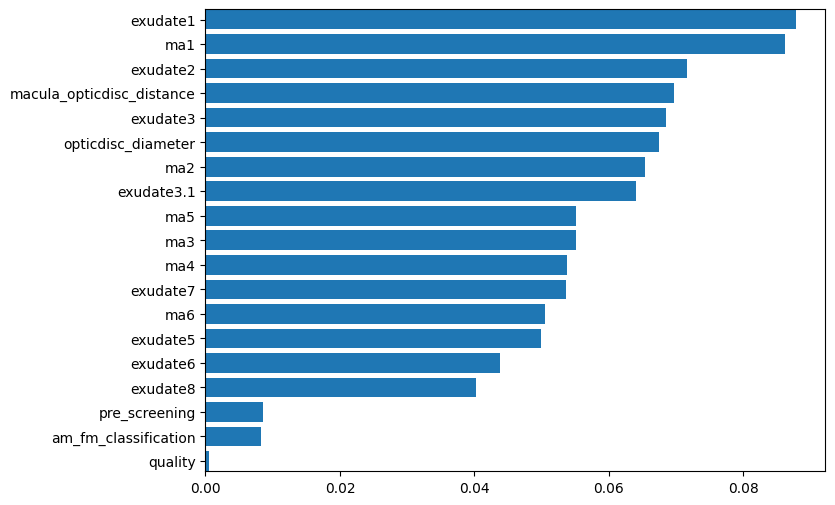

In [36]:
# Plot the feature importances
features = sorted(zip(X.columns, importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [37]:
feature_names = X.columns

# Define tree-based models
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Extremely Random Trees", ExtraTreesClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier())
]

# Prepare an empty list to store feature importance data for each model
feature_importances_list = []

# Fit each model and append their feature importances to the list
for name, model in models:
    model.fit(X, y)
    if hasattr(model, 'feature_importances_'):
        # Append a dictionary for each model's feature importances
        feature_importances_list.append(dict(zip(feature_names, model.feature_importances_)))

# Create a DataFrame from the list of dictionaries
feature_importances_df = pd.DataFrame(feature_importances_list, index=[name for name, _ in models])

# Transpose the DataFrame to have models' names as the index and feature names as columns
feature_importances_df = feature_importances_df.T

# Display the DataFrame
feature_importances_df



,Decision Tree,Random Forest,Extremely Random Trees,Gradient Boosting,AdaBoost
quality,0.000000,0.000944,0.002126,0.003861,0.00
pre_screening,0.008320,0.007444,0.013683,0.011646,0.02
ma1,0.113904,0.088000,0.104970,0.235808,0.22
ma2,0.024246,0.060964,0.076659,0.010214,0.00
ma3,0.021373,0.058205,0.064884,0.027744,0.02
ma4,0.024073,0.045706,0.065218,0.039468,0.00
ma5,0.054915,0.052924,0.062214,0.035874,0.08
ma6,0.046944,0.055249,0.063990,0.063901,0.08
exudate1,0.098217,0.089272,0.071597,0.099734,0.14
exudate2,0.063138,0.070362,0.059516,0.067106,0.00


# Backward Ensemble Attempt

The backward ensemble method starts with a full set of models and iteratively removes the least contributing models based on performance until a desired number of models or performance criterion is met. This method ensures that only the most relevant models are included, which can improve the performance and efficiency of the ensemble.

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define your initial ensemble
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True)),
    ('KNeighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Extra Trees', ExtraTreesClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gaussian NB', GaussianNB())
]
ensemble = VotingClassifier(estimators=models, voting='soft')

# Initial evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
initial_score = np.mean(cross_val_score(ensemble, X_train, y_train, cv=5, scoring='accuracy'))
print(f"Initial ensemble score: {initial_score}")

# Backward bundling
for _ in range(len(models) - 1):  # Leave at least one model
    scores = []
    for name, _ in models:
        # Create a temporary ensemble without one model
        temp_ensemble = VotingClassifier(estimators=[m for m in models if m[0] != name], voting='soft')
        # Evaluate performance
        score = np.mean(cross_val_score(temp_ensemble, X_train, y_train, cv=5, scoring='accuracy'))
        scores.append((name, score))
    
    # Find the model whose removal affects the ensemble the least
    scores.sort(key=lambda x: x[1], reverse=True)
    to_remove = scores[0][0]
    print(f"Removing {to_remove} with score {scores[0][1]}")
    models = [m for m in models if m[0] != to_remove]
    if len(models) == 1:  # Stop if only one model left
        break

# Final ensemble and its performance
final_ensemble = VotingClassifier(estimators=models, voting='soft')
final_score = np.mean(cross_val_score(final_ensemble, X_train, y_train, cv=5, scoring='accuracy'))
print(f"Final ensemble score: {final_score}")


Initial ensemble score: 0.7043478260869565
Removing Decision Tree with score 0.7141304347826087
Removing Gaussian NB with score 0.7163043478260869
Removing Random Forest with score 0.7282608695652174
Removing Extra Trees with score 0.7347826086956522
Removing KNeighbors with score 0.7478260869565216
Removing SVC with score 0.7597826086956522
Removing AdaBoost with score 0.7586956521739131
Removing Gradient Boosting with score 0.7336956521739131
Final ensemble score: 0.7336956521739131
